# Notebook V1.0

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer

In [2]:
test = pd.read_csv('../data/raw/test.csv')
train = pd.read_csv('../data/raw/train.csv')

In [3]:
test.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6


In [4]:
train.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [5]:
train.columns = [column.lower() for column in train.columns]

In [6]:
train.head()

,id,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Checking null values

In [7]:
test.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8068 non-null   int64  
 1   gender           8068 non-null   object 
 2   ever_married     7928 non-null   object 
 3   age              8068 non-null   int64  
 4   graduated        7990 non-null   object 
 5   profession       7944 non-null   object 
 6   work_experience  7239 non-null   float64
 7   spending_score   8068 non-null   object 
 8   family_size      7733 non-null   float64
 9   var_1            7992 non-null   object 
 10  segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [9]:
train.isna().sum()

id                   0
gender               0
ever_married       140
age                  0
graduated           78
profession         124
work_experience    829
spending_score       0
family_size        335
var_1               76
segmentation         0
dtype: int64

In [10]:
na_cols = ['ever_married', 'graduated', 'profession', 'work_experience', 'family_size', 'var_1']

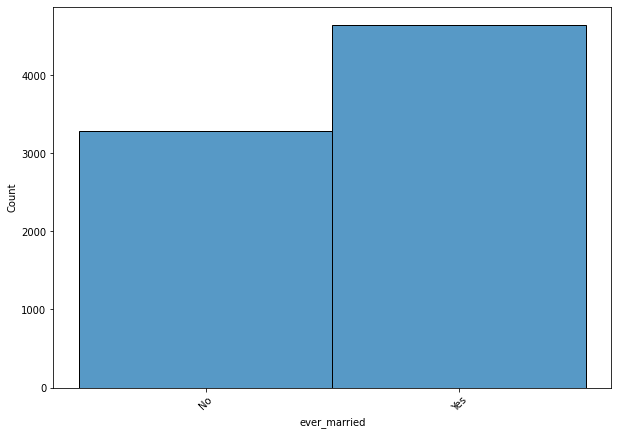

ever_married
Yes    4643
No     3285
NaN     140
Name: count, dtype: int64
---------------------------------------------


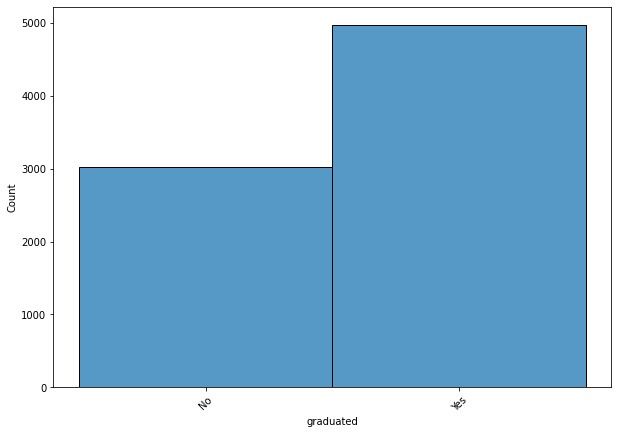

graduated
Yes    4968
No     3022
NaN      78
Name: count, dtype: int64
---------------------------------------------


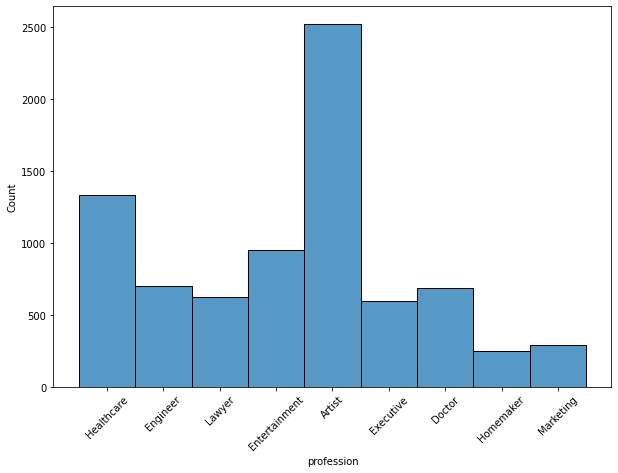

profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
NaN               124
Name: count, dtype: int64
---------------------------------------------


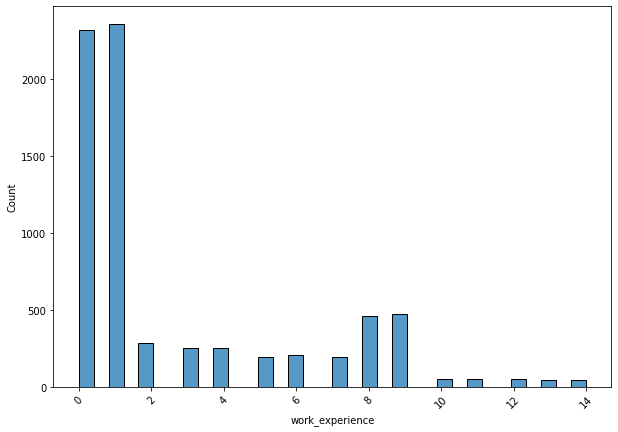

work_experience
1.0     2354
0.0     2318
NaN      829
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: count, dtype: int64
---------------------------------------------


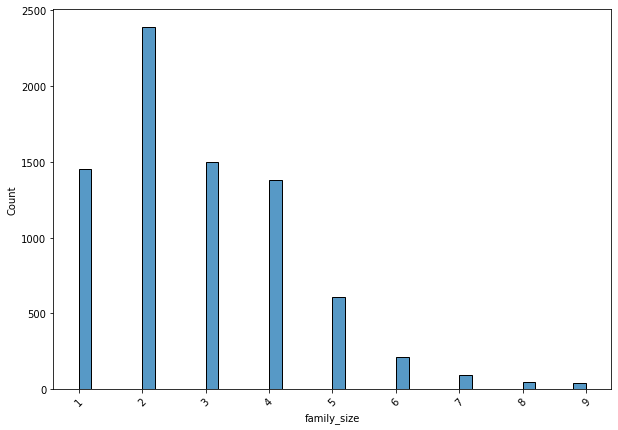

family_size
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
NaN     335
6.0     212
7.0      96
8.0      50
9.0      44
Name: count, dtype: int64
---------------------------------------------


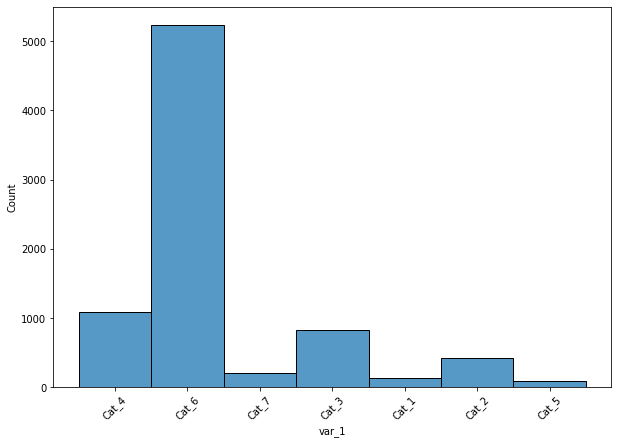

var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
NaN        76
Name: count, dtype: int64
---------------------------------------------


In [11]:
for col in na_cols:
    plt.figure(figsize=(10, 7))
    sns.histplot(train[col])
    plt.xticks(rotation = 45)
    plt.show()
    print(train[col].value_counts(dropna=False))
    print('---------' * 5)

## Split dataset into categoricals and numericals

In [12]:
train_numericals = train.select_dtypes(np.number)
print('Numerical features')
print(f'Observations: {train_numericals.shape[0]}, Features: {train_numericals.shape[1]}')
print(f'Features: {train_numericals.columns}')

Numerical features
Observations: 8068, Features: 4
Features: Index(['id', 'age', 'work_experience', 'family_size'], dtype='object')


In [13]:
train_categoricals = train.select_dtypes(exclude=np.number)
print('Categorical features')
print(f'Observations: {train_categoricals.shape[0]}, Features: {train_categoricals.shape[1]}')
print(f'Features: {train_categoricals.columns}')

Categorical features
Observations: 8068, Features: 7
Features: Index(['gender', 'ever_married', 'graduated', 'profession', 'spending_score',
       'var_1', 'segmentation'],
      dtype='object')


## Dealing with missing values

In [14]:
# Filling missing values on categorical columns with mode value
for col in ['ever_married', 'graduated', 'var_1']:
    train_categoricals[col] = train_categoricals[col].fillna(train_categoricals[col].mode()[0])

In [15]:
train_categoricals['profession'] = train_categoricals['profession'].apply( lambda x: x if x is not np.nan else 'unknown')

In [16]:
def compare_imputation(col,df,new_column):
    if max(df[col].value_counts())>max(new_column.value_counts()):
        limit = max(df[col].value_counts())*1.25
    else:
        limit = max(new_column.value_counts())*1.25
    
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    sns.histplot(x=col, data=df, ax=ax[0])
    ax[0].set_title("Before the imputation")
    ax[0].set_ylim((0,limit))
    sns.histplot(x=new_column, ax=ax[1])
    ax[1].set_title("After the imputation")
    ax[1].set_ylim((0,limit))
    plt.show()

In [17]:
family_size_new = train_numericals['family_size'].fillna(train_numericals['family_size'].median())

In [18]:
work_experience_new = train_numericals['work_experience'].fillna(train_numericals['work_experience'].median())

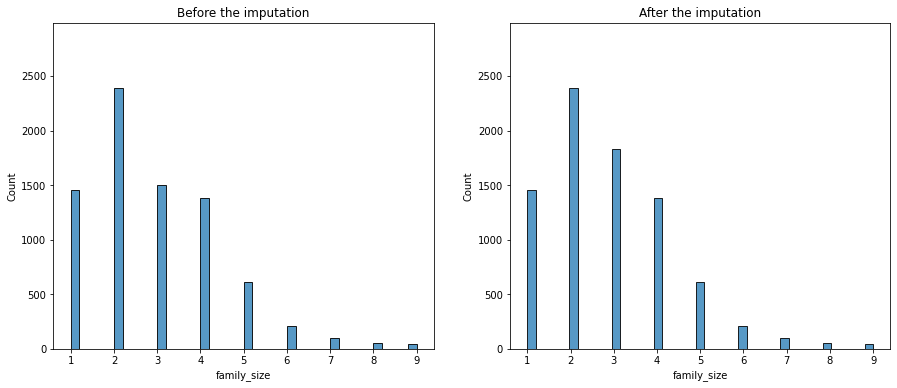

In [19]:
compare_imputation('family_size', train_numericals, family_size_new)

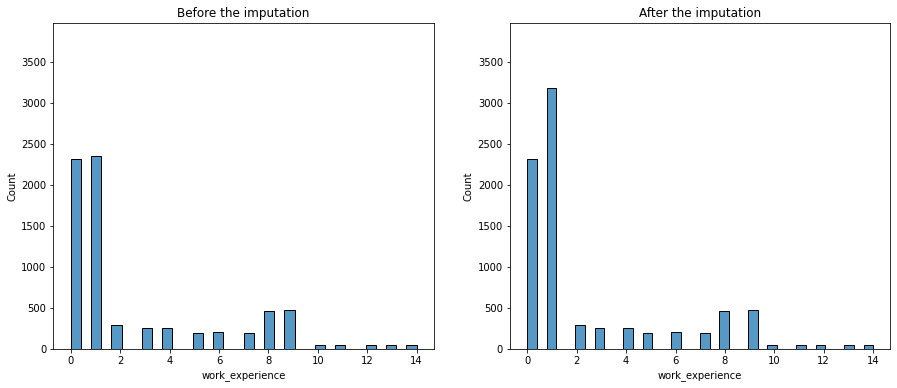

In [20]:
compare_imputation('work_experience', train_numericals, work_experience_new)

In [21]:
train_numericals['work_experience'] = train_numericals['work_experience'].fillna(train_numericals['work_experience'].median())

In [22]:
train_numericals['family_size'] = train_numericals['family_size'].fillna(train_numericals['family_size'].median())

## Encoding features (Categoricals)

In [23]:
%run ../encoders/ordinal_encoder.ipynb
%run ../encoders/onehot_encoder.ipynb
%run ../encoders/label_encoder.ipynb
%run ../encoders/get_dummies.ipynb

In [24]:
var_cats = ['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7']

In [25]:
score_cats = ['Low', 'Average', 'High']

In [26]:
pending_score_encoded = ordinal_encoded('spending_score', train_categoricals, score_cats)

In [27]:
var_encoded = ordinal_encoded('var_1', train_categoricals, var_cats)

In [28]:
segmentation_encoded = label_encoded('segmentation', train_categoricals)

In [29]:
train_categoricals['spending_score_enc'] = pending_score_encoded

In [30]:
train_categoricals['var_enc'] = var_encoded

In [31]:
gender_encoded = dummies_encoded('gender', train_categoricals)

In [32]:
ever_married_encoded = dummies_encoded('ever_married', train_categoricals)

In [33]:
graduated_encoded = dummies_encoded('graduated', train_categoricals)

In [34]:
profession_encoded = dummies_encoded('profession', train_categoricals)

In [35]:
train_categoricals = pd.concat([train_categoricals, gender_encoded, ever_married_encoded, graduated_encoded, profession_encoded], axis = 1)

In [36]:
train_categoricals = train_categoricals.drop(columns=['gender', 'ever_married', 'graduated', 'profession', 'spending_score', 'var_1'])

In [37]:
train_categoricals

,segmentation,spending_score_enc,var_enc,gender_Male,ever_married_Yes,graduated_Yes,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,profession_unknown
0,3,0.0,3.0,True,False,False,False,False,False,False,True,False,False,False,False
1,0,1.0,3.0,False,True,True,False,True,False,False,False,False,False,False,False
2,1,0.0,5.0,False,True,True,False,True,False,False,False,False,False,False,False
3,1,2.0,5.0,True,True,True,False,False,False,False,False,False,True,False,False
4,0,2.0,5.0,False,True,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,3,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,True
8064,3,0.0,3.0,True,False,False,False,False,False,True,False,False,False,False,False
8065,3,0.0,5.0,False,False,True,False,False,False,False,True,False,False,False,False
8066,1,0.0,5.0,False,False,True,False,False,False,False,True,False,False,False,False


In [38]:
data = pd.concat([train_numericals, train_categoricals], axis = 1)

In [39]:
data

,id,age,work_experience,family_size,segmentation,spending_score_enc,var_enc,gender_Male,ever_married_Yes,graduated_Yes,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,profession_unknown
0,462809,22,1.0,4.0,3,0.0,3.0,True,False,False,False,False,False,False,True,False,False,False,False
1,462643,38,1.0,3.0,0,1.0,3.0,False,True,True,False,True,False,False,False,False,False,False,False
2,466315,67,1.0,1.0,1,0.0,5.0,False,True,True,False,True,False,False,False,False,False,False,False
3,461735,67,0.0,2.0,1,2.0,5.0,True,True,True,False,False,False,False,False,False,True,False,False
4,462669,40,1.0,6.0,0,2.0,5.0,False,True,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,22,0.0,7.0,3,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,True
8064,464685,35,3.0,4.0,3,0.0,3.0,True,False,False,False,False,False,True,False,False,False,False,False
8065,465406,33,1.0,1.0,3,0.0,5.0,False,False,True,False,False,False,False,True,False,False,False,False
8066,467299,27,1.0,4.0,1,0.0,5.0,False,False,True,False,False,False,False,True,False,False,False,False


In [40]:
data.drop(columns=['id'], inplace=True)

In [41]:
data.to_csv('../data/cleaned/train.csv')

## Split data into X and y

In [42]:
X = data.drop(columns=['segmentation'])

In [43]:
y = data['segmentation']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling features

In [45]:
%run ../scalers/standard_scaler.ipynb

In [46]:
X_train = my_scaler(X_train)

In [47]:
X_test = my_scaler(X_test)

## Evaluate models

In [55]:
%run ../models/random_classifier.ipynb
%run ../models/random_classifier_tuned.ipynb
%run ../models/knn_classifier.ipynb
%run ../models/knn_classifier_tuned.ipynb

### Random Forest

In [49]:
accuracy_rf, report_rf, confusion_mtx_rf = random_clf(X_train, X_test, y_train, y_test)

In [50]:
print("\nRandom Forest Model:")
print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{report_rf}")


Random Forest Model:
Accuracy: 0.47026022304832715
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.36      0.36       391
           1       0.36      0.35      0.35       369
           2       0.48      0.47      0.48       380
           3       0.63      0.65      0.64       474

    accuracy                           0.47      1614
   macro avg       0.46      0.46      0.46      1614
weighted avg       0.47      0.47      0.47      1614



### Random Forest Tuned

In [53]:
accuracy_rf_tuned, report_rf_tuned, confusion_mtx_rf_tuned = rf_tuned(X_train, X_test, y_train, y_test)

In [54]:
print("\nRandom Forest Tuned Model:")
print(f"Accuracy: {accuracy_rf_tuned}")
print(f"Classification Report:\n{report_rf_tuned}")


Random Forest Tuned Model:
Accuracy: 0.5123915737298637
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42       391
           1       0.40      0.33      0.36       369
           2       0.51      0.53      0.52       380
           3       0.64      0.72      0.68       474

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.49      1614
weighted avg       0.50      0.51      0.51      1614



### KNN 

In [56]:
accuracy_knn, report_knn, confusion_mtx_knn = knn_clf(X_train, X_test, y_train, y_test)

In [57]:
print("\nK-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {accuracy_knn}")
print(f"Classification Report:\n{report_knn}")


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.46592317224287483
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.43      0.39       391
           1       0.35      0.35      0.35       369
           2       0.47      0.45      0.46       380
           3       0.68      0.60      0.64       474

    accuracy                           0.47      1614
   macro avg       0.47      0.46      0.46      1614
weighted avg       0.48      0.47      0.47      1614



### KNN Tuned

In [58]:
accuracy_knn_tuned, report_knn_tuned, confusion_mtx_knn_tuned = knn_tuned(X_train, X_test, y_train, y_test)

In [59]:
print("\nK-Nearest Neighbors (KNN) Tuned Model:")
print(f"Accuracy: {accuracy_knn_tuned}")
print(f"Classification Report:\n{report_knn_tuned}")


K-Nearest Neighbors (KNN) Tuned Model:
Accuracy: 0.49318463444857497
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.40      0.39       391
           1       0.40      0.34      0.37       369
           2       0.50      0.51      0.51       380
           3       0.64      0.68      0.66       474

    accuracy                           0.49      1614
   macro avg       0.48      0.48      0.48      1614
weighted avg       0.49      0.49      0.49      1614

